In [1]:
import msprime, tskit
from IPython.display import SVG
import numpy as np
import matplotlib.pyplot as plt
from algorithm import *

In [2]:
ts = msprime.sim_ancestry(3, population_size=1000, sequence_length=1e6, recombination_rate=1e-8,
                         record_full_arg=True)

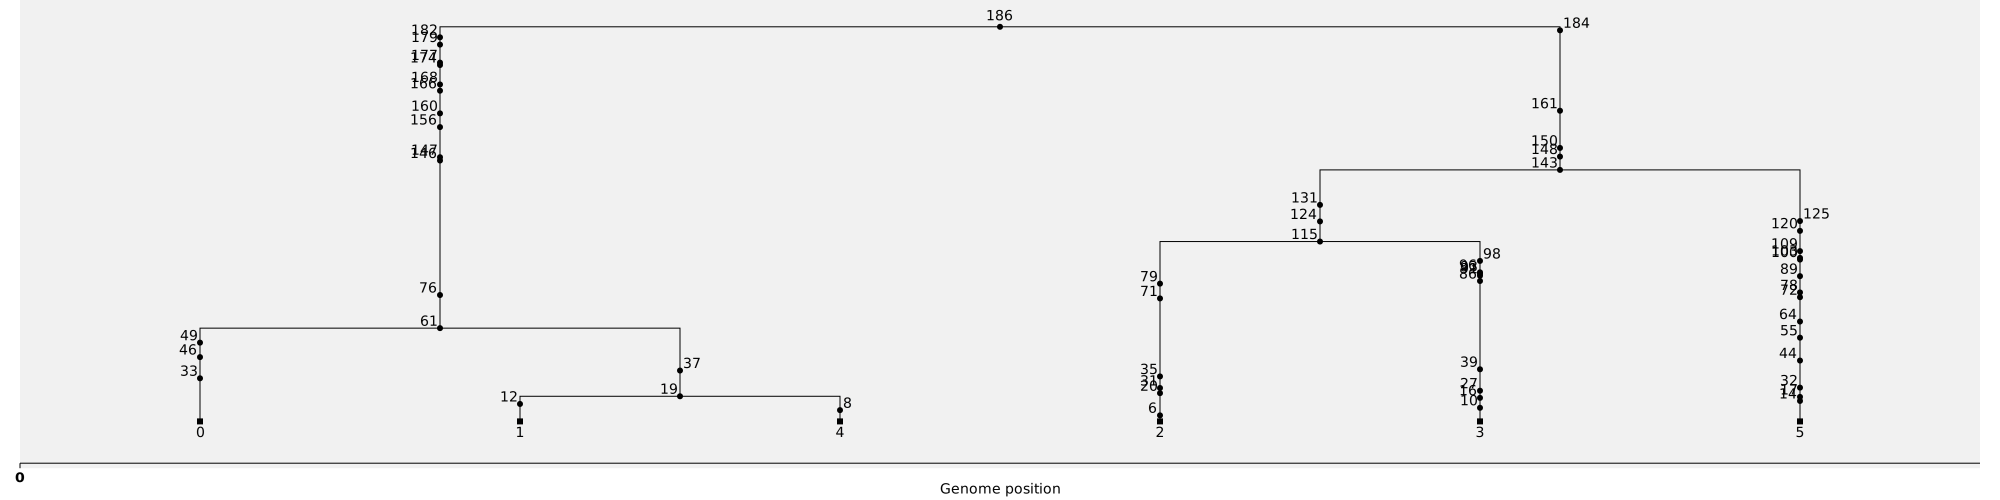

In [3]:
SVG(ts.draw_svg(size=(2000, 500), x_lim=[0, 1e4]))

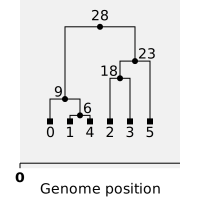

In [4]:
sts = ts.simplify()
SVG(sts.draw_svg(x_lim=[0, 1e4]))

[196, 151, 144]


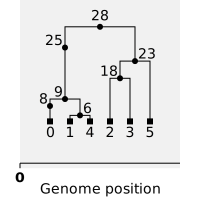

In [5]:
ets, n = extend_edges(sts)
print(n)
SVG(ets.draw_svg(x_lim=[0, 1e4]))

In [15]:
def get_span_stats(ts, ets):
    time_map = {}
    for n in ts.nodes():
        time_map[n.time] = n.id
    total_added_span = 0
    wrongly_added_span = 0
    for interval, t, et in ts.coiterate(ets):
        interval_length = interval[1] - interval[0]
        t_nodes = list(t.nodes())
        for n in et.nodes():
            if et.num_children(n) == 1:
                total_added_span += interval_length
            on = time_map[et.time(n)]
            if on not in t_nodes:
                assert et.num_children(n) == 1
                wrongly_added_span += interval_length
    return total_added_span, wrongly_added_span

In [16]:
total_added_span, wrongly_added_span = get_span_stats(ts, ets)
print(f"Out of a total of {total_added_span} added edge span, "
      f"we have wrongly added {wrongly_added_span} span, "
      f"a proportion of {wrongly_added_span / total_added_span}.")

Out of a total of 2419978.0 added edge span, we have wrongly added 4861.0 span, a proportion of 0.002008695946822657.


# What's the sampling distribution?

In [40]:
reps = msprime.sim_ancestry(20, population_size=1000, sequence_length=1e6, recombination_rate=1e-8,
                           record_full_arg=True, num_replicates=100)
totals = []
wrongs = []
for ts in reps:
    ets, _ = extend_edges(ts.simplify())
    a, b = get_span_stats(ts, ets)
    totals.append(a)
    wrongs.append(b)

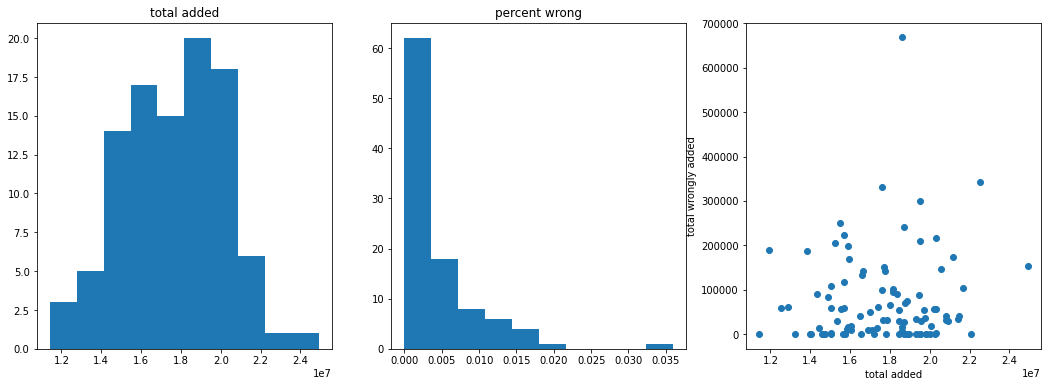

In [41]:
totals = np.array(totals)
wrongs = np.array(wrongs)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))
ax1.hist(totals)
ax1.set_title("total added")
ax2.hist(wrongs/totals)
ax2.set_title("percent wrong")
ax3.scatter(totals, wrongs)
ax3.set_xlabel("total added")
ax3.set_ylabel("total wrongly added");